In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logger = logging.getLogger()
logger.handlers.clear()

# format
formatter = logging.Formatter('[%(asctime)s] [%(levelname)s] %(message)s')

# add stream handler
handler = logging.StreamHandler(sys.stdout)                             
handler.setFormatter(formatter)
logger.addHandler(handler)

# enable all logging level
logger.setLevel(logging.INFO)

In [3]:
import os
os.environ['OKFP_ROOT'] = 'C:/Users/sean9/Downloads/FrontPanelUSB'

Definition for the board.

In [4]:
from ece437.ok import OKFrontPanel

path = "C:/Users/sean9/ECE437/Final/Final.runs/impl_1/final_top.bit"
fp = OKFrontPanel(firmware_path=path)

Start talking to CMV300.

In [5]:
from ece437.spi import SPIControllerEndpoints
from ece437.sensor.cmv300 import CMV300Endpoints

SPI_ENDPOINTS = SPIControllerEndpoints(
    RESET = 0x00,
    DATA_IN = 0x01,
    DATA_OUT = 0x20,
    TRIGGER_IN = 0x40,
    TRIGGER_OUT = 0x60,

    RESET_MASK = 0,

    START_MASK = 0,
    MEM_RESET_MASK = 1,
    MEM_WRITE_MASK = 2,
    MEM_READ_MASK = 3,

    DONE_MASK = 0
)

CMV300_ENDPOINTS = CMV300Endpoints(
    RESET = 0x00,
    TRIGGER_IN = 0x41,
    TRIGGER_OUT = 0x61,
    PIPE = 0xA0,

    RESET_MASK = 1,

    START_MASK = 0,

    READY_MASK = 0,
    DONE_MASK = 1
)

[2022-12-13 19:05:52,515] [ERROR] firmware file does not exist
[2022-12-13 19:05:52,516] [INFO] reset SPI controller
[2022-12-13 19:05:52,517] [INFO] reset CMV300 sequencer
[2022-12-13 19:05:52,522] [INFO] wait_sys_ready TRUE
[2022-12-13 19:05:52,523] [INFO] serial=1911000P3V


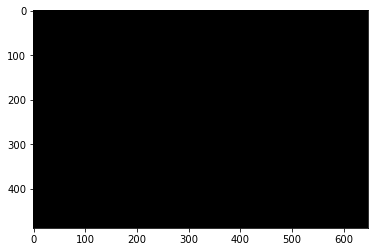

In [6]:
from ece437.spi import SPIController
from ece437.sensor.cmv300 import CMV300
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

# device
spi = SPIController(fp, SPI_ENDPOINTS)
camera = CMV300(fp, spi, CMV300_ENDPOINTS)

# prepare the figure
fig, ax = plt.subplots(1, 1)
im = np.zeros((488, 648), np.uint8)
h = ax.imshow(im, cmap='gray')
h.set_clim(0, 255)
ax.axis('tight')

with fp, spi, camera:
    logger.info(f"serial={fp.serial_number}")

    def image_update(index, camera):
        print(index)
        im = camera.get_image()
        h.set_data(im)
        ax.set_title(f'frame={index}')
        return h, 
        
    ani = anim.FuncAnimation(
        fig, 
        partial(image_update, camera=camera), 
        interval=100, frames=10, blit=False
    )
    plt.show()